# Image Segmentation - Boundary Detection with Image Contours

In this first practice notebook of the image segmentation techniques we would work with boundary detection using the image contours. In the same context previously we did some exercise on separating objects from the background and even replacing the background for an object. That exercise is also relevant here. Hence we'd start with a recap of that exercise.

We'd separate an object from the background and replace the original background using the HSV color space. From their the idea of separating an object from the background using te image contour would stem.

In [114]:
# Import necessary modules and packages
from typing import Tuple, List
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

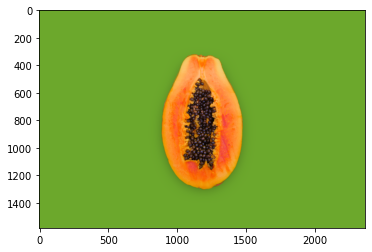

In [115]:
# Import image resource and visualize
papaya: np.ndarray = cv2.imread(filename='images/papaya.png')
papaya = cv2.cvtColor(src=papaya, code=cv2.COLOR_BGR2RGB)
plt.imshow(papaya)

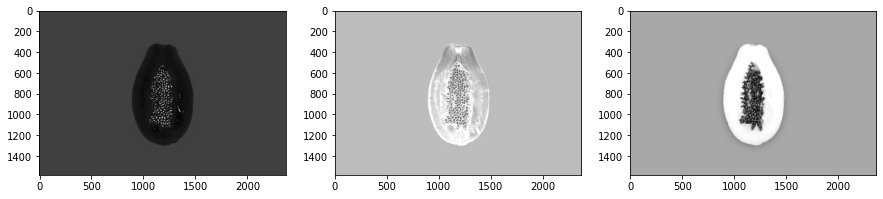

In [116]:
# Convert the image into HSV color space create mask for separating the background
papaya_hsv: np.ndarray = cv2.cvtColor(src=papaya, code=cv2.COLOR_RGB2HSV)
h, s, v = papaya_hsv[:, :, 0], papaya_hsv[:, :, 1], papaya_hsv[:, :, 2]
_, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax1.imshow(h, cmap='gray')
ax2.imshow(s, cmap='gray')
ax3.imshow(v, cmap='gray')

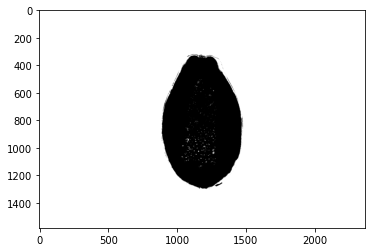

In [117]:
lower_bound: np.ndarray = np.array([20, 0, 0])
upper_bound: np.ndarray = np.array([45, 255, 255])
mask: np.ndarray = cv2.inRange(src=papaya_hsv, lowerb=lower_bound, upperb=upper_bound)
plt.imshow(mask, cmap='gray')

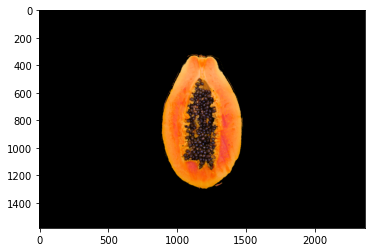

In [118]:
# Make a copy of the rgb image and see the effect of the mask
papaya_copy: np.ndarray = np.copy(papaya)
papaya_copy[mask != 0] = 0
plt.imshow(papaya_copy)

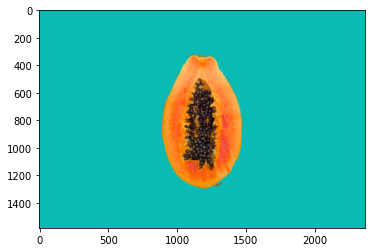

In [119]:
# Replace the background
background: np.ndarray = cv2.imread(filename='images/background.jpg')
background = cv2.cvtColor(src=background, code=cv2.COLOR_BGR2RGB)
background[mask == 0] = 0
papaya_new: np.ndarray = papaya_copy + background
plt.imshow(papaya_new)

With the exercise above we tried to recall one aspect, where we separated the object of interest from the background. With this image segmentation we would do the same by creating a boundary along the object image using image contours.

## Image Contours

Some example applications of image contours are found in motion detection and image segmentation as described in this [article](https://learnopencv.com/contour-detection-using-opencv-python-c/).

When we join all the points on the boundary of an object, we get a contour. Typically, a specific contour refers to boundary pixels that have the same color and intensity. In this exercise two [OpenCV](https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html) functions would be fundamental for us.

* [findContours](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0) finds the contour in a binary image, more specifically an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero pixels remain 0's, so the image is treated as binary . You can use compare, inRange, threshold , adaptiveThreshold, Canny, and others to create a binary image out of a grayscale or color one. If mode equals to RETR_CCOMP or RETR_FLOODFILL, the input can also be a 32-bit integer image of labels (CV_32SC1). Following parameters are therefore relevant for us.

    * `image` - Binary image
    * `mode` - [RetrievalModes](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga819779b9857cc2f8601e6526a3a5bc71), retrieval for contours.
    * `method` - [ContourApproximationModes](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga4303f45752694956374734a03c54d5ff), approximation mode for contours. Following are the approximation algorithms, which are relevant for us in this exercise.
    
        * `cv2.CHAIN_APPROX_NONE` algorithm stores absolutely all the contour points. That is, any 2 subsequent points (x1,y1) and (x2,y2) of the contour will be either horizontal, vertical or diagonal neighbors, that is, max(abs(x1-x2),abs(y2-y1))==1.
        
        * `cv2.CHAIN_APPROX_SIMPLE` algorithm compresses horizontal, vertical, and diagonal segments and leaves only their end points. For example, an up-right rectangular contour is encoded with 4 points.

* [drawContours](https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc) plots the contours on the image. Following parameters are relevant for us.

    * `image` - Destination image.

    * `contours` - Collection of points making the contour.

    * `contourIdx` - Parameter indicating a contour to draw. If it is negative, all the contours are drawn.

    * `color` - Color for the contours.
    
    * `thickness` - Thickness of lines the contours are drawn with. If it is negative (for example, thickness=FILLED ), the contour interiors are drawn.

In simpler terms in order to find the image contours we need to prepare the binary image using threshold or edge detection. The quality of the image boundary depends on the quality of the binary image. The algorithm needs to clearly detect the intensity difference at the edges. 

In [120]:
# Create binary form for the papaya image
papaya_gray: np.ndarray = cv2.cvtColor(src=papaya, code=cv2.COLOR_RGB2GRAY)
# Comparing between the cv2.THRESH_BINARY and cv2.THRESH_BINARY_INV
_, papaya_bin = cv2.threshold(src=papaya_gray, thresh=115, maxval=255, type=cv2.THRESH_BINARY)
_, papaya_bin_inv = cv2.threshold(src=papaya_gray, thresh=115, maxval=255, type=cv2.THRESH_BINARY_INV)

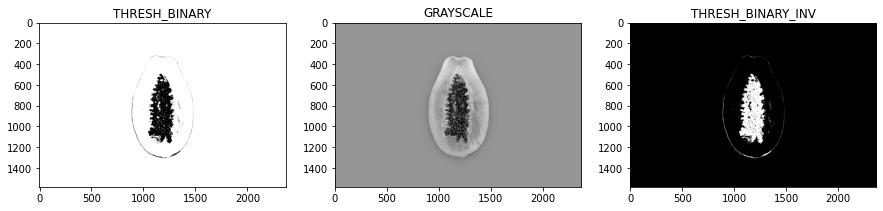

In [121]:
_, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax1.imshow(papaya_bin, cmap='gray')
ax1.set_title('THRESH_BINARY')
ax2.imshow(papaya_gray, cmap='gray')
ax2.set_title('GRAYSCALE')
ax3.imshow(papaya_bin_inv, cmap='gray')
ax3.set_title('THRESH_BINARY_INV');

We did not use the `cv2.THRESH_BINARY_INV` [ThresholdTypes](https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#gaa9e58d2860d4afa658ef70a9b1115576) before. The way it differs from `cv2.THRESH_BINARY` is, that THRESH_BINARY makes every pixel having intensity greater than threshold set to max intensity and everything less than threshold to 0. In contrast, THRESH_BINARY_INV does the opposite. It makes every pixel having intensity greater than threshold set to 0 and everything less than threshold set to 255.

Usually inverse binary threshold images are good for contour detection. Let's take that and try to use both of our algorithms to see, what kind of contours we can detect for the image.

In [122]:
# Find the contours using method cv2.CHAIN_APPROX_NONE and cv2.CHAIN_APPROX_SIMPLE algorithms
contours_none, hierarchy = cv2.findContours(image=papaya_bin_inv, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
contours_simple, hierarchy = cv2.findContours(image=papaya_bin_inv, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)

In [123]:
papaya_cp_none: np.ndarray = np.copy(papaya)
papaya_cp_simple: np.ndarray = np.copy(papaya)
papaya_cp_none = cv2.drawContours(image=papaya_cp_none, contours=contours_none, contourIdx=-1, color=(0, 0, 255), thickness=10)
papaya_cp_simple = cv2.drawContours(image=papaya_cp_simple, contours=contours_simple, contourIdx=-1, color=(0, 0, 255), thickness=10)

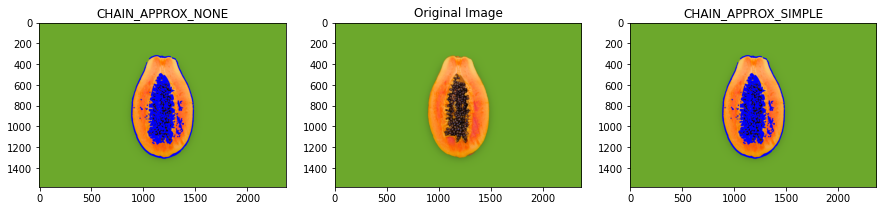

In [124]:
_, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax1.imshow(papaya_cp_none)
ax1.set_title('CHAIN_APPROX_NONE')
ax2.imshow(papaya)
ax2.set_title('Original Image')
ax3.imshow(papaya_cp_simple)
ax3.set_title('CHAIN_APPROX_SIMPLE');

We have discovered image contours, which we have drawn along the boundary of the object using `drawContours` function. We also see, that using `CHAIN_APPROX_NONE` and `CHAIN_APPROX_SIMPLE` did not make any difference noticeable difference for us. The algorithm `CHAIN_APPROX_SIMPLE` usually results is fewer contour points, but in this case we see no difference, because the `drawContour` function connects the adjacent points as described in this [article](https://learnopencv.com/contour-detection-using-opencv-python-c/).

The papaya image is tricky to handle. Let's try the process once more with a simpler image.

In [125]:
# Import the hand image
thumbs: np.ndarray = cv2.imread(filename='images/thumbs_up_down.jpg')
thumbs = cv2.cvtColor(src=thumbs, code=cv2.COLOR_BGR2RGB)
thumbs_gray: np.ndarray = cv2.cvtColor(src=thumbs, code=cv2.COLOR_RGB2GRAY)

In [126]:
# Create binary image with threshold
_, thumbs_bin = cv2.threshold(src=thumbs_gray, thresh=220, maxval=255, type=cv2.THRESH_BINARY_INV)

In [127]:
# Find contours from binary image
thumbs_contour, _ = cv2.findContours(image=thumbs_bin, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)

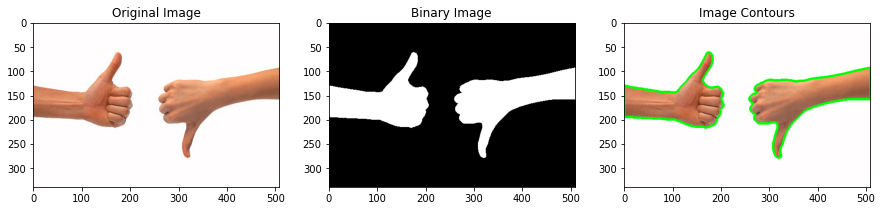

In [128]:
# Copy the original image and draw the contours
thumbs_copy: np.ndarray = np.copy(thumbs)
thumbs_copy = cv2.drawContours(image=thumbs_copy, contours=thumbs_contour, contourIdx=-1, color=(0, 255, 0), thickness=3)
_, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax1.imshow(thumbs)
ax1.set_title('Original Image')
ax2.imshow(thumbs_bin, cmap='gray')
ax2.set_title('Binary Image')
ax3.imshow(thumbs_copy)
ax3.set_title('Image Contours');

## Contour Properties

With this exercise we are going to explore some properties for the image contours such as the terminal points for the image contour, orientation of the contour, bounding rectangle etc..

### Terminal Points

In order to show the terminal points of the contour we'd have to understand, what contour really returns. We have inspected the return in the following cell.

In [129]:
left_hand_contour, right_hand_contour = thumbs_contour[1], thumbs_contour[0]
left_hand_contour.shape, right_hand_contour.shape

((252, 1, 2), (278, 1, 2))

In this case we have two objects in the image and as a result we have two image contours for the left and right hand. We see, that the `findContours` in this case returns a tuple of two arrays. Each of the arrays has the coordinates of the points to draw the contour for a single hand.

Taking the first one as an example, we have 278 points in three dimensions. So a single point (x, y) is denoted by a (1,2) dimensional array. If we want to select all the x-components together we have to slice by selecting all(:) from the first two axes and then select 0 from the third axis. Similar logic goes for selecting all y-components e.g., `[:, :, i]`.

In order to determine the terminal or extreme points we have tried to find the index of largest and smallest x and y components using `argmax` and `argmin`. When we index the three dimensional array with these max and min indices at axis-0 to find the point we'd get a two dimensional array (1,2). Hence we'd again have to select the first and only element using 0 index `[0]` two extract one dimensional array of two integers.

In [130]:
left_hand_left: Tuple[np.int32, np.int32] = tuple(left_hand_contour[left_hand_contour[:, :, 0].argmin()][0])
left_hand_right: Tuple[np.int32, np.int32] = tuple(left_hand_contour[left_hand_contour[:, :, 0].argmax()][0])
left_hand_top: Tuple[np.int32, np.int32] = tuple(left_hand_contour[left_hand_contour[:, :, 1].argmin()][0])
left_hand_bottom: Tuple[np.int32, np.int32] = tuple(left_hand_contour[left_hand_contour[:, :, 1].argmax()][0])

right_hand_left: Tuple[np.int32, np.int32] = tuple(right_hand_contour[right_hand_contour[:, :, 0].argmin()][0])
right_hand_right: Tuple[np.int32, np.int32] = tuple(right_hand_contour[right_hand_contour[:, :, 0].argmax()][0])
right_hand_top: Tuple[np.int32, np.int32] = tuple(right_hand_contour[right_hand_contour[:, :, 1].argmin()][0])
right_hand_bottom: Tuple[np.int32, np.int32] = tuple(right_hand_contour[right_hand_contour[:, :, 1].argmax()][0])

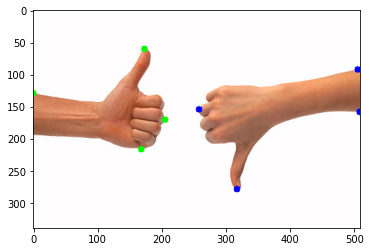

In [131]:
thumbs_copy: np.ndarray = np.copy(thumbs)

for center in [left_hand_left, left_hand_right, left_hand_top, left_hand_bottom]:
    thumbs_copy = cv2.circle(img=thumbs_copy, center=center, radius=1, color=(0, 255, 0), thickness=8)

for center in [right_hand_left, right_hand_right, right_hand_top, right_hand_bottom]:
    thumbs_copy = cv2.circle(img=thumbs_copy, center=center, radius=1, color=(0, 0, 255), thickness=8)

plt.imshow(thumbs_copy)

### Orientation

The orientation of an object is the angle at which an object is directed. To find the angle of a contour, we should first find an ellipse that fits the contour and then extract the `angle` from that shape.

* [fitEllipse](https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#gaf259efaad93098103d6c27b9e4900ffa) fits and ellipse around a set of 2D points. The function calculates the ellipse that fits (in a least-squares sense) a set of 2D points best of all. It returns the rotated rectangle in which the ellipse is inscribed. The only parameter is,

    * `points` - set of 2D points.

The `fitEllipse` function returns the (x, y) coordinate for the center of ellipse, its major and minor axes and angle, in which the said rectangle is rotated w.r.t. positive x-axis. Following is an outline of the function call.

```python
# Fit an ellipse to a contour and extract the angle from that ellipse
(x,y), (MA,ma), angle = cv2.fitEllipse(selected_contour)
```

**Orientation Values**

These orientation values are in degrees measured from the x-axis. A value of zero means a flat line, and a value of 90 means that a contour is pointing straight up!

So, the orientation angles that we calculate for each contour should be able to tell us something about the general position of the hand. The hand with it's thumb up, should have a higher (closer to 90 degrees) orientation than the hand with it's thumb down.


In [132]:
def contour_orientation(img: np.ndarray, contours: List[np.ndarray]) -> Tuple[List[float], np.ndarray]:
    """Derive orientations from the passed in contours and draws the ellipses on a copy of the image"""
    angles: List[float] = []
    for cnt in contours:
        center, axes, angle = cv2.fitEllipse(points=cnt)
        center, axes = np.int32(center), np.int32(axes)
        img = cv2.ellipse(img=img, center=center, axes=axes, 
                        angle=angle, startAngle=0, endAngle=360, 
                        color=(255, 0, 0), thickness=2)
        angles.append(angle)
    return angles, img

Left hand contour orientation: 83.56391143798828
Right hand contours orientation: 60.63807678222656


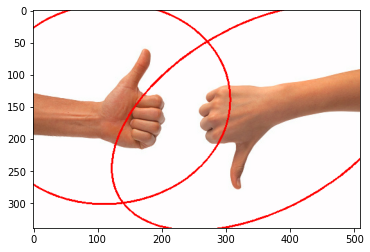

In [133]:
angles, img = contour_orientation(img=np.copy(thumbs), contours=list(thumbs_contour))
print(f'Left hand contour orientation: {angles[1]}')
print(f'Right hand contours orientation: {angles[0]}')
plt.imshow(img);

### Bounding Rectangle

We we would find the bounding rectangle around the *left* hand contour, which has its thumb up, then use that bounding rectangle to crop the image and better focus on that one hand. In order to do that we need the following methods.

* [boundingRect](https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga103fcbda2f540f3ef1c042d6a9b35ac7) - calculates and returns the minimal up-right bounding rectangle for the specified point set or non-zero pixels of gray-scale image. We would have to provide the contours as the `array` parameter. It returns the top left corner coordinates of the rectangle along with its width and height.

* [rectangle](https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#ga07d2f74cadcf8e305e810ce8eed13bc9) - draws an outline or filled rectangle on the image. In order to do that we have to provide following parameters.

* `img` - image ti draw the rectangle on.
* `pt1` - top left coordinate of the rectangle.
* `pt2` - bottom right coordinate of the rectangle.
* `color` - color to draw the rectangle with.
* `thickness` - thickness of the lines that make up the rectangle. Negative values, like [FILLED](https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#gaf076ef45de481ac96e0ab3dc2c29a777), mean that the function has to draw a filled rectangle.

We'd create a function, that takes the copy of the image and contours and returns the image with the bounding rectangle(s) drawn along with cropped image(s) along the bounding rectangles. Following are the outlines of the functions calls.

```python
# Find the bounding rectangle of a selected contour
x,y,w,h = cv2.boundingRect(selected_contour)

# Draw the bounding rectangle as a purple box
box_image = cv2.rectangle(contours_image, (x,y), (x+w,y+h), (200,0,200),2)
```

And to crop the image, select the correct width and height of the image to include.

```python
# Crop using the dimensions of the bounding rectangle (x, y, w, h)
cropped_image = image[y: y + h, x: x + w] 
```

In [134]:
def bounding_recangle(img: np.ndarray, contours: List[np.ndarray]) -> Tuple[np.ndarray, List[np.ndarray]]:
    """Computes the bounding rectangle for the objects in the image derived from the contours abd draws 
    the rectangles on a copy of the image."""
    cropped: List[np.ndarray] = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(array=cnt)
        cropped.append(np.copy(img[y:y+h, x:x+w, :]))
        img = cv2.rectangle(img=img, pt1=(x, y), pt2=(x + w, y + h), color=(200, 0, 200), thickness=2)
    return img, cropped
        

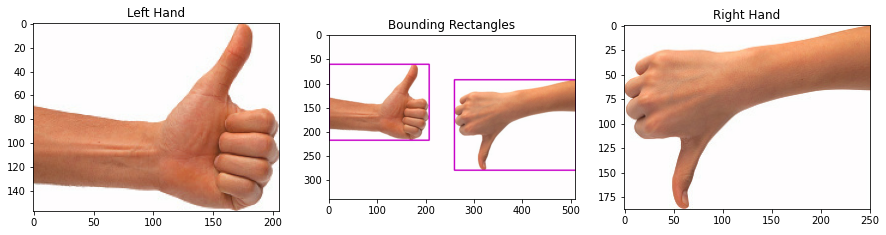

In [135]:
drawn, cropped = bounding_recangle(img=np.copy(thumbs), contours=thumbs_contour)
_,(ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax1.imshow(cropped[1])
ax1.set_title('Left Hand')
ax2.imshow(drawn)
ax2.set_title('Bounding Rectangles')
ax3.imshow(cropped[0])
ax3.set_title('Right Hand');

In this notebook we saw two different ways to separate an object of interest from the background. Each having own pitfall and utilities. We'd learn these utilities in context of image segmentation.